# Code Authored 
# by 
# Raakesh Sureshkumar 

# Dataset collection

In [1]:
import numpy as np
import pandas as pd

def get_phase1_data():
    
    df = pd.read_csv('dataset/dataset_phase1_group10.csv', encoding="utf-8")
    df.dropna(axis=0, how='all')
    df.astype(str)
    
    machine_text = df['Machine_text']
    human_text = df['Human_text']
    rows = machine_text.shape[0]
    type_column = list(np.append(np.ones((1,rows)), np.zeros((1,rows))))
    machine_list = machine_text.tolist()
    human_list = human_text.tolist()
    text_column = []
    text_column.extend(human_list)
    text_column.extend(machine_list)

    df_eval = pd.DataFrame([text_column, type_column])
    df_eval = df_eval.transpose()

    #Remove the unwanted records that do not contain string data
    check_dtype = df_eval[0].map(type) == str

    for index, i in enumerate(check_dtype):
        if(i==False):
            df_eval = df_eval.drop(axis=0, index=[index])

    # Rename index values for indexing it out later
    df_eval = df_eval.rename(columns={0:'text', 1:'type'})
    df_eval['type'].value_counts()
    
    return df_eval

def get_tweepfake_data():
    
    df = pd.read_csv("dataset/test.csv")
    df.dropna(axis=0, how='all')
    df.astype(str)
    text_column = df.text.tolist()
    class_col = df['account.type']
    class_col_cor = [1 if x=="human" else 0 for x in class_col]
    df_eval = pd.DataFrame([text_column, class_col_cor])

    # Rename index values for indexing it out later
    df_eval = df_eval.transpose()
    df_eval = df_eval.rename(columns={0:'text', 1:'type'})
    
    return df_eval

# ML Classifiers using sci-kit-learn pipelines

Naive Bayes CLassifier:
Accuracy=0.9771
Naive Bayes CLassifier:
Accuracy=0.7031

Linear Support Vector Classifier:
Accuracy=0.9989

Linear Support Vector Classifier:
Accuracy=0.7253

Linear Regression Classifier:
Accuracy=0.9575

Linear Regression Classifier:
Accuracy=0.7383


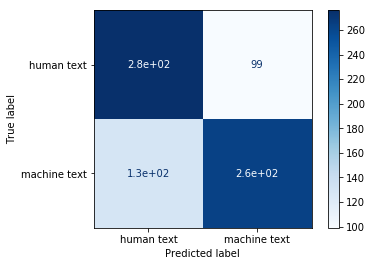

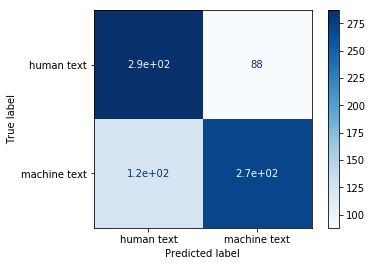

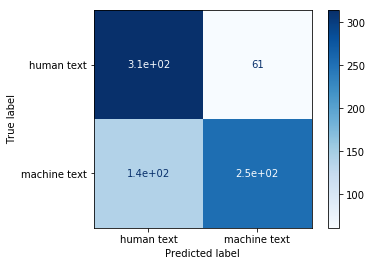

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

df_data = get_tweepfake_data()
df_news = df_data['text']
df_type = df_data['type']

# Split them into test and train sets
train_x, test_x, train_y, test_y = train_test_split(df_news, df_type, test_size = 0.3, random_state=1000)

# Convert the Series into a list
train_x = train_x.tolist()
train_y = train_y.tolist()
test_x = test_x.tolist()
test_y = test_y.tolist()

# Setup the pipelines for the classifier models
stop_words_list = ['can', 'couldn', 'hasn', 'a', 'about', 'above', 'across', 'again', 'against', 
                   'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'am', 
                   'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 
                   'anyone', 'anything', 'anyway', 'are', 'as', 'at', 'back', 'be', 'became', 
                   'because', 'become', 'becomes', 'been', 'behind', 'being', 'below', 'beside', 
                   'besides', 'between', 'bill', 'both', 'but', 'by', 'call', 'can`t', 'cannot',
                   'cant', 'co', 'con', 'couldn`t', 'couldn’t', 'cry', 'de', 'describe', 
                   'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'either',
                   'else', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
                   'everything', 'except', 'few', 'fill', 'find', 'fire', 'for', 'former',
                   'formerly', 'found', 'from', 'front', 'full', 'further', 'get', 'give', 
                   'go', 'had', 'has', 'hasn’t', 'have', 'he', 'hence', 'her', 'here', 'hereby',
                   'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 
                   'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 
                   'into', 'is', 'it', 'its', 'itself', 'keep', 'last', 'least', 'less', 'ltd',
                   'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 
                   'moreover', 'most', 'mostly', 'move', 'much', 'must', 'my', 'myself', 'name',
                   'namely', 'neither', 'never', 'nevertheless', 'nobody', 'none', 'nor', 'not',
                   'nothing', 'now', 'of', 'off', 'often', 'on', 'onto', 'or', 'other', 'others', 
                   'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 
                   'perhaps', 'please', 'put', 'rather', 're', 'same', 'see', 'seem', 'seemed', 
                   'seeming', 'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 
                   'since', 'sincere', 'so', 'some', 'somehow', 'someone', 'something', 
                   'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 'take', 
                   'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence',
                   'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 
                   'these', 'they', 'thick', 'thin', 'this', 'those', 'though', 'through', 
                   'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 
                   'towards', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via',
                   'was', 'we', 'well', 'were', 'what', 'whatever', 'whence', 'whereafter'
                   , 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 
                   'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose',
                   'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your',
                   'yours', 'yourself', 'yourselves']

# Naive Bayes 
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer(stop_words = stop_words_list)), ('clf', MultinomialNB()),])

# Linear SVC
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer(stop_words = stop_words_list)),('svc', LinearSVC())])

# Logistic Regression
text_clf_lgrg = Pipeline([('tfidf', TfidfVectorizer(stop_words = stop_words_list)), ('lgrg', LogisticRegression())])

# Naive Bayes
text_clf_nb.fit(train_x, train_y)
predictions = text_clf_nb.predict(train_x)
print("Naive Bayes CLassifier:\nAccuracy={:.4f}".format(metrics.accuracy_score(train_y, predictions)))
predictions = text_clf_nb.predict(test_x)
print("Naive Bayes CLassifier:\nAccuracy={:.4f}".format(metrics.accuracy_score(test_y, predictions)))

# Plot the confusion matrix
disp_cm = plot_confusion_matrix(text_clf_nb, test_x, test_y, 
                                display_labels = ['human text', 'machine text'], 
                                cmap=plt.cm.Blues)

# SVC
text_clf_lsvc.fit(train_x, train_y)
predictions = text_clf_lsvc.predict(train_x)
print("\nLinear Support Vector Classifier:\nAccuracy={:.4f}".format(metrics.accuracy_score(train_y, predictions)))
predictions = text_clf_lsvc.predict(test_x)
print("\nLinear Support Vector Classifier:\nAccuracy={:.4f}".format(metrics.accuracy_score(test_y, predictions)))

# Plot the confusion matrix
disp_cm = plot_confusion_matrix(text_clf_lsvc, test_x, test_y, 
                                display_labels = ['human text', 'machine text'], 
                                cmap=plt.cm.Blues)

# Linear Regression
text_clf_lgrg.fit(train_x, train_y)
predictions = text_clf_lgrg.predict(train_x)
print("\nLinear Regression Classifier:\nAccuracy={:.4f}".format(metrics.accuracy_score(train_y, predictions)))
predictions = text_clf_lgrg.predict(test_x)
print("\nLinear Regression Classifier:\nAccuracy={:.4f}".format(metrics.accuracy_score(test_y, predictions)))

# Plot the confusion matrix
disp_cm = plot_confusion_matrix(text_clf_lgrg, test_x, test_y, 
                                display_labels = ['human text', 'machine text'], 
                                cmap=plt.cm.Blues)

# Function to plot accuracy and loss

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title(title + '\nTraining and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title(title + '\nTraining and validation loss')
    plt.legend()

# Feature Extraction

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vect_cv = CountVectorizer()
vect_cv.fit(train_x)
X_train_cv = vect_cv.transform(train_x)
X_test_cv = vect_cv.transform(test_x)

vect_tf = TfidfVectorizer()
vect_tf.fit(train_x)
X_train_tf = vect_tf.transform(train_x)
X_test_tf = vect_tf.transform(test_x)

# Building a Neural model

### Perceptron - Using TfiDf vectorizer

Training Accuracy: 0.9994
Testing Accuracy: 0.7083


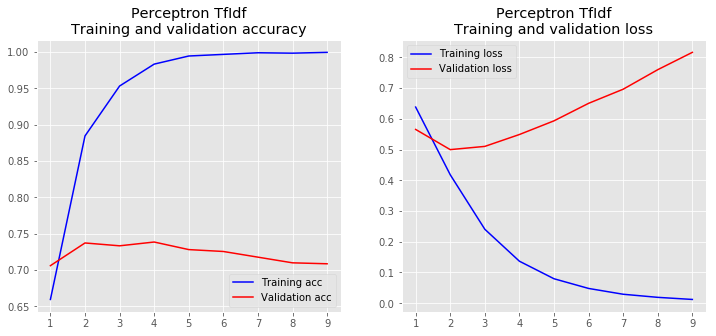

In [5]:
# Basic model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Get the model configuration params
train_epochs = 9
train_batch_size = 2

# Input data to be fed to the model
x_train = X_train_tf.toarray().astype(np.float32)
y_train = np.array(train_y).astype(np.float32)
x_test = X_test_tf.toarray().astype(np.float32)
y_test = np.array(test_y).astype(np.float32)
input_dim = x_train.shape[1]

# Build the model
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

# Compile the model for training
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

# Fit the model to the training set
model_fit = model.fit(x_train, y_train,
                     epochs = train_epochs,
                     verbose = False,
                     validation_data = (x_test, y_test),
                     batch_size=train_batch_size)

# Model evaluation parameters
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

plot_history(model_fit, "Perceptron TfIdf")

### Perceptron - Using Count vectorizer

Training Accuracy: 0.9994
Testing Accuracy: 0.7096


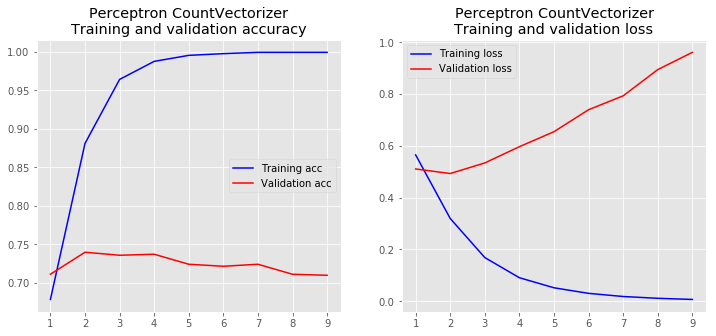

In [6]:
# Basic model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Get the model configuration params
train_epochs = 9
train_batch_size = 2

# Input data to be fed to the model
input_dim = x_train.shape[1]
x_train = X_train_cv.toarray().astype(np.float32)
y_train = np.array(train_y).astype(np.float32)
x_test = X_test_cv.toarray().astype(np.float32)
y_test = np.array(test_y).astype(np.float32)

# Build the model
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

# Compile the model for training
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

# Fit the model to the training set
model_fit = model.fit(x_train, y_train,
                     epochs = train_epochs,
                     verbose = False,
                     validation_data = (x_test, y_test),
                     batch_size=train_batch_size)

# Model evaluation parameters
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

plot_history(model_fit, "Perceptron CountVectorizer")

# Word Embeddings - GloVe

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Perform tokenization on the input text
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_x)

# Convert the tokenized vectors into sequences to be fed for embedding
x_train_tok = tokenizer.texts_to_sequences(train_x)
x_test_tok = tokenizer.texts_to_sequences(test_x)

# Get the size of the tokenizer voabulary based upon the input corpus
vocab_size = len(tokenizer.word_index) + 1

max_len = max([len(i) for i in x_train_tok]) + 1

# Perform sequence padding as the size of the data output from the texts_to_sequencces output
# lists may not be the same depending upon the input corpus
x_train_pad = pad_sequences(x_train_tok, padding="post", maxlen=max_len)
x_test_pad = pad_sequences(x_test_tok, padding="post", maxlen=max_len)

# Function to create the embedded vectors for further classification
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(
                vector, dtype=np.float32)[:embedding_dim]
                
    return embedding_matrix

# Set the dimensions for output of the word vector embeddings using the Glove text embedding library
embedding_dim = 100
embedding_matrix = create_embedding_matrix('glove.6B/glove.6B.200d.txt', tokenizer.word_index, embedding_dim)

# Filter out the the zero embedding vectors
non_zero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))

Using TensorFlow backend.


### Training model with embedding layer - training parameter - False

284
7537
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 284, 100)          753700    
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 754,721
Trainable params: 1,021
Non-trainable params: 753,700
_________________________________________________________________
Training accuracy: 0.7810
Test data accuracy: 0.6940


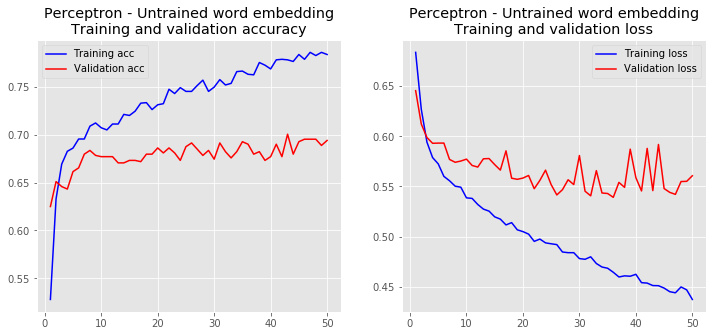

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

embedding_dim = 100
print(max_len)
print(vocab_size)

model = Sequential()
model.add(layers.Embedding(input_dim = vocab_size, 
                           output_dim = embedding_dim, 
                           input_length = max_len,
                           weights = [embedding_matrix],
                          trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])
model.summary()

model_fit = model.fit(x_train_pad, y_train,
                     epochs = 50,
                     verbose=False,
                     validation_data=(x_test_pad, y_test),
                     batch_size=10)

loss, accuracy = model.evaluate(x_train_pad, y_train, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test_pad, y_test, verbose=False)
print("Test data accuracy: {:.4f}".format(accuracy))

plot_history(model_fit, "Perceptron - Untrained word embedding")

### Training model with embedding layer - training parameter - True

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 284, 100)          753700    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 754,721
Trainable params: 754,721
Non-trainable params: 0
_________________________________________________________________
Training accuracy: 1.0000
Test data accuracy: 0.7135


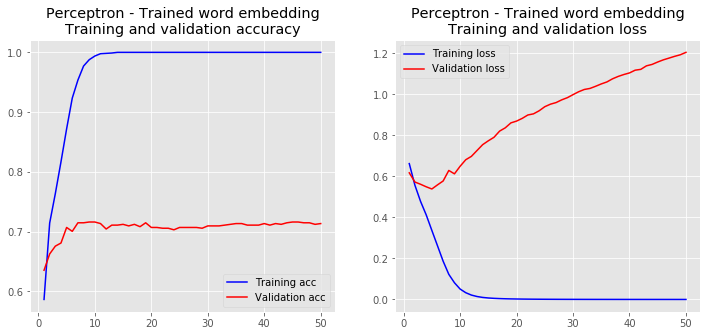

In [9]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim = vocab_size, 
                           output_dim = embedding_dim, 
                           input_length = max_len,
                           weights = [embedding_matrix],
                          trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])
model.summary()

model_fit = model.fit(x_train_pad, y_train,
                     epochs = 50,
                     verbose=False,
                     validation_data=(x_test_pad, y_test),
                     batch_size=10)

loss, accuracy = model.evaluate(x_train_pad, y_train, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test_pad, y_test, verbose=False)
print("Test data accuracy: {:.4f}".format(accuracy))

plot_history(model_fit, "Perceptron - Trained word embedding")

# Using CNN

## CNN - Un-optmized

In [10]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(layers.Conv1D(128, 5, activation="relu"))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])
model.summary()

# Get the train and test accuracy
loss, accuracy = model.evaluate(x_train_pad, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test_pad, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 284, 100)          753700    
_________________________________________________________________
conv1d (Conv1D)              (None, 280, 128)          64128     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 819,129
Trainable params: 819,129
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 0.4799
Testing Accuracy: 0.4935


# Hyper-parameter optimization

## RandomizedCV

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import pandas as pd
import numpy as np

# Define the model to be searched for the in the grid search
def create_model(num_filters, kernel_size, vocabulary_size, embedding_dim, maxlen):
    model=Sequential()
    model.add(layers.Embedding(vocabulary_size, embedding_dim, input_length=maxlen,
                              weights = [embedding_matrix], trainable=True))
    model.add(layers.Conv1D(num_filters, kernel_size, activation="relu"))
    model.add(layers.GlobalMaxPooling1D())
#     model.add(layers.Conv1D(32, kernel_size=5, activation="relu"))
    model.add(layers.Dense(20, activation="relu"))
    model.add(layers.Dense(10, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer = "adam",
                 loss="binary_crossentropy",
                 metrics=["accuracy"])
    return model


# Define a class to include Lemmatization before word tokenization
class LemmaTokenizer(object):
    
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

# Define the variables
embedding_dim = 100
    
# Defining the stop_words_list
stop_words_list = ['can', 'couldn', 'hasn', 'a', 'about', 'above', 'across', 'again', 'against', 
                   'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'am', 
                   'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 
                   'anyone', 'anything', 'anyway', 'are', 'as', 'at', 'back', 'be', 'became', 
                   'because', 'become', 'becomes', 'been', 'behind', 'being', 'below', 'beside', 
                   'besides', 'between', 'bill', 'both', 'but', 'by', 'call', 'can`t', 'cannot',
                   'cant', 'co', 'con', 'couldn`t', 'couldn’t', 'cry', 'de', 'describe', 
                   'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'either',
                   'else', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
                   'everything', 'except', 'few', 'fill', 'find', 'fire', 'for', 'former',
                   'formerly', 'found', 'from', 'front', 'full', 'further', 'get', 'give', 
                   'go', 'had', 'has', 'hasn’t', 'have', 'he', 'hence', 'her', 'here', 'hereby',
                   'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 
                   'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 
                   'into', 'is', 'it', 'its', 'itself', 'keep', 'last', 'least', 'less', 'ltd',
                   'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 
                   'moreover', 'most', 'mostly', 'move', 'much', 'must', 'my', 'myself', 'name',
                   'namely', 'neither', 'never', 'nevertheless', 'nobody', 'none', 'nor', 'not',
                   'nothing', 'now', 'of', 'off', 'often', 'on', 'onto', 'or', 'other', 'others', 
                   'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 
                   'perhaps', 'please', 'put', 'rather', 're', 'same', 'see', 'seem', 'seemed', 
                   'seeming', 'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 
                   'since', 'sincere', 'so', 'some', 'somehow', 'someone', 'something', 
                   'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 'take', 
                   'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence',
                   'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 
                   'these', 'they', 'thick', 'thin', 'this', 'those', 'though', 'through', 
                   'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 
                   'towards', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via',
                   'was', 'we', 'well', 'were', 'what', 'whatever', 'whence', 'whereafter'
                   , 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 
                   'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose',
                   'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your',
                   'yours', 'yourself', 'yourselves']
  
# Create an embedding matrix
# Function to create the embedded vectors for further classification
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(
                vector, dtype=np.float32)[:embedding_dim]
                
    return embedding_matrix
    
# Toggles
USE_COUNT_VECT = True

# Required Settings
epochs = 20
embedding_dim = 100
maxlen = 100
output_file = "data/output_3.txt"

# Read the dataset as a dataframe
df = pd.read_csv("archive/test.csv")
df.dropna(axis=0, how='all')
df.astype(str)
text_column = df.text.tolist()
class_col = df['account.type']
class_col_cor = [1 if x=="human" else 0 for x in class_col]
df_eval = pd.DataFrame([text_column, class_col_cor])
df_eval = df_eval.transpose()
df_eval = df_eval.rename(columns={0:'text', 1:'type'})

# Input and Class values
X = df_eval['text'].values
y = df_eval['type'].values


# Split the test and train data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1000)

# print(type(train_x))

# Tokenize words

max_len = 0

if(USE_COUNT_VECT == True):
    # Using Count Vectorizer
    vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(),
                                strip_accents = 'unicode',
                                stop_words = stop_words_list,
                                lowercase = False,
                                token_pattern = r'\b[a-zA-Z]{3,}\b', # keeps words of 3 or more characters
                                max_df=0.8)
    vectorizer.fit(train_x)
    X_train_cv = vectorizer.transform(train_x)
    X_train = X_train_cv.toarray().astype(np.float32)
    max_len = max([len(i) for i in X_train]) + 1
    X_train =pad_sequences(X_train, padding="post", maxlen=max_len)
    X_test_cv = vectorizer.transform(test_x)
    X_test = X_test_cv.toarray().astype(np.float32)
#     print(type(X_test))
    X_test =pad_sequences(X_test, padding="post", maxlen=max_len)
    vocab_size = len(vectorizer.vocabulary_) + 1
    
     # Set the dimensions for output of the word vector embeddings using the Glove text embedding library
    embedding_matrix = create_embedding_matrix('glove.6B/glove.6B.200d.txt', 
                                           vectorizer.vocabulary_, 
                                           embedding_dim)
    
else:
    # Using Tokenizer
    tokenizer = Tokenizer(num_words = 5000)
    tokenizer.fit_on_texts(train_x)
    X_train = tokenizer.texts_to_sequences(train_x)
    max_len = max([len(i) for i in X_train]) + 1
    X_train =pad_sequences(X_train, padding="post", maxlen=max_len)
    X_test = tokenizer.texts_to_sequences(test_x)
    X_test = pad_sequences(X_test, padding="post", maxlen=max_len)
    vocab_size = len(tokenizer.word_index) + 1
    
    # Set the dimensions for output of the word vector embeddings using the Glove text embedding library
    embedding_matrix = create_embedding_matrix('glove.6B/glove.6B.200d.txt', 
                                           tokenizer.word_index, 
                                           embedding_dim)
    

# Define the parameter grid for the grid search
param_grid = dict(num_filters=[32, 64, 128],
                 kernel_size=[3, 5, 7],
                 vocab_size=[5000],
                 embedding_dim=[50],
                 maxlen=max_len)
    
Y_train = np.array(train_y)
Y_test = np.array(test_y)


# Grid search params
param_grid = dict(num_filters=[32, 64, 128],
                 kernel_size=[3, 5, 7],
                 vocabulary_size=[vocab_size],
                 embedding_dim=[100],
                 maxlen=[max_len])

# Define the model
model = KerasClassifier(build_fn=create_model,
                        epochs=epochs,
                        batch_size=10,
                        verbose=False)

# Establishing the grid
grid = RandomizedSearchCV(estimator=model,
                         param_distributions=param_grid,
                         cv=4,
                         verbose=False,
                         n_iter=5)

# Fit the data with the model
print("Fitting data model")
grid_result = grid.fit(X_train, Y_train)
print("Fit done")

# Evaluate with the testing set
print("Evaluating test set")
test_accuracy = grid.score(X_test, Y_test)
print("Evaluation done")

# Save the model and evaluate the results
prompt = input("Finished grid search. Write to file? [Y/N]:")
if(prompt.lower() in ["y", "yes"]):
    with open(output_file, 'a') as f: # Appends with the outputfile specified
            s = ("Results for input data set:\nTest accuracy: {:.4f}\nTraining params: {}\nBest accuracy {:.4f}\n")
            output_string = s.format(
            test_accuracy,
            grid_result.best_params_,
            grid_result.best_score_
            )
            print(output_string)
            f.write(output_string)

C:\Users\raake\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\raake\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['`', 'ha', 'le', 't', 'u', 'wa', '’'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Fitting data model


In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
nltk.download('wordnet')

## CNN Optimized

In [ ]:
# Using Count Vectorizer
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(),
                            strip_accents = 'unicode',
                            stop_words = stop_words_list,
                            lowercase = False,
                            token_pattern = r'\b[a-zA-Z]{3,}\b', # keeps words of 3 or more characters
                            max_df=0.8)
vectorizer.fit(train_x)
X_train_cv = vectorizer.transform(train_x)
max_len = max([len(i) for i in X_train]) + 1
X_train =pad_sequences(X_train, padding="post", maxlen=max_len)
X_train = X_train_cv.toarray().astype(np.float32)

X_test_cv = vectorizer.transform(test_x)
#     print(type(X_test))
X_test =pad_sequences(X_test, padding="post", maxlen=max_len)
X_test = X_test_cv.toarray().astype(np.float32)

vocab_size = len(vectorizer.vocabulary_) + 1

Y_train = np.array(train_y).astype(np.float32)
Y_test = np.array(test_y).astype(np.float32)

print(type(X_train[0][0]))
print(type(X_test[0][0]))
print(type(Y_test[0]))

#  # Set the dimensions for output of the word vector embeddings using the Glove text embedding library
# embedding_matrix = create_embedding_matrix('glove.6B/glove.6B.200d.txt', 
#                                        vectorizer.vocabulary_, 
#                                        embedding_dim)

model=Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen,
                          weights = [embedding_matrix], trainable=True))
model.add(layers.Conv1D(32, 5, activation="relu"))
model.add(layers.GlobalMaxPooling1D())
#     model.add(layers.Conv1D(32, kernel_size=5, activation="relu"))
model.add(layers.Dense(20, activation="relu"))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(optimizer = "adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

model.summary()

model_fit = model.fit(X_train, Y_train,
                     epochs = 50,
                     verbose=True,
                     validation_data=(X_test, Y_test),
                     batch_size=10)

# Get the train and test accuracy
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

plot_history(model)